In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('S BostonHousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.shape

(506, 14)

In [4]:
# Où sont les NaN?
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# Tous les NaN sont-ils concentrés sur les mêmes 20 lignes?
df[df.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


# imputation des valeurs manquantes par la médiane

In [6]:
# Créons un df séparé nommé 'M' pour Médiane
M = df.copy()

# Imputons 
M.fillna((M.quantile(0.5)), inplace=True)

# imputation des valeurs manquantes par KNNImputer

In [7]:
# Mettre le df au format array, séparer input et output
data = df.values
ix = [i for i in range (df.shape[1]) if i != 13] 
X, y = data[:,ix], data[:,13]

# Imputons
from sklearn.impute import KNNImputer
imputer = KNNImputer()  # Gardons les valeurs par défaut: n=5, metric= nan_euclidean
Xtrans = imputer.fit_transform(X)

In [8]:
# Transformer Xtrans en dataframe (pour future visualisation)
KNN = pd.DataFrame (Xtrans)
KNN.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
# Réintégrer la colonne MEDV
KNN['MEDV']=df['MEDV']
KNN.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


# Imputation des valeurs manquantes par interpolation linéaire

In [9]:
IL = df.copy()
IL.interpolate(method='linear', inplace=True)

# Pas d'imputation ! 

In [10]:
# Y -a-t-il beaucoup de NaN ? (en % du nombre de valeurs)
NbNaN = df.isna().sum().sum()
NbCases = df.shape[0]*df.shape[1]

PCNaN = NbNaN/NbCases*100
print ( 'Les NaN représentent %.2f%% des valeurs' % (PCNaN) )

Les NaN représentent 1.69% des valeurs


In [11]:
# Supprimons-les
D = df.copy()
D.dropna(inplace=True)

# Comparer les imputations

In [12]:
# Liste des index de lignes ayant des NaN dans LSTAT
Index = df[df['LSTAT'].isna()].index.tolist()

# Pour chaque méthode d'imputation, générer un fichier avec uniquement les lignes imputées
M2 = M.iloc[Index]
KNN2 = KNN.iloc[Index]
IL2 = IL.iloc[Index]

<AxesSubplot:title={'center':'Imputation de LSTAT'}, xlabel='LSTAT', ylabel='MEDV'>

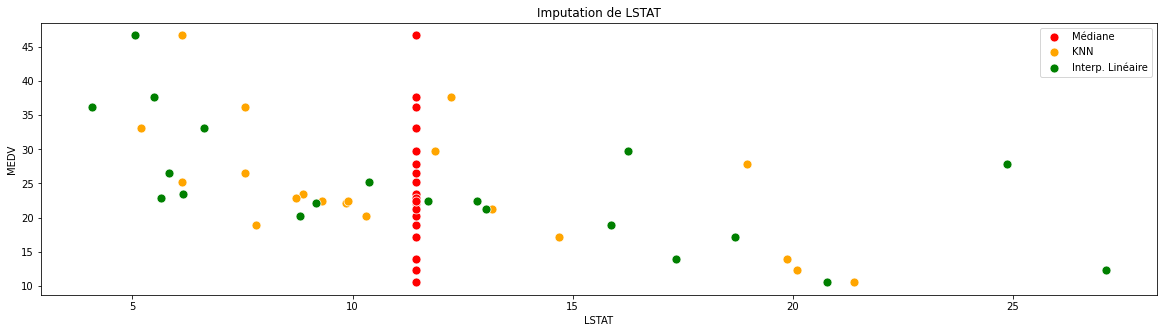

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
plt.title('Imputation de LSTAT')
sns.scatterplot(data=M2, x="LSTAT", y="MEDV",  color = 'r',s=80, label="Médiane")
sns.scatterplot(data=KNN2, x="LSTAT", y="MEDV",  color = 'orange' ,s=80,  label="KNN")
sns.scatterplot(data=IL2, x="LSTAT", y="MEDV",  color = 'g',s=80,  label="Interp. Linéaire")

# Impact du mode d'imputation sur la classification

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score 
from sklearn.metrics import r2_score

In [15]:
# Decision Tree après imputation par la médiane
# Définir X et y
data = M.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')

# Scinder le dataset en 5 groupes égaux , répéter l'opération 10 fois (paramétrages par défaut) 
#(sera réutilisé pour les modèles suivants)
data = M.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')
cv = RepeatedKFold()

# Evaluer modèle par Repeated KFold
scoresM = cross_val_score(Model, X, y,  cv=cv, scoring='r2') 

In [16]:
# Decision Tree après imputation par KNN
data = KNN.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')

# evaluer modèle par RepeatedKfold
data = KNN.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')

scoresKNN = cross_val_score(Model, X, y,  cv=cv, scoring='r2') 

In [17]:
# Decision Tree après imputation par interpolation linéaire
data = IL.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')

# evaluer modèle par RepeatedKfold
data = IL.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')
scoresIL = cross_val_score(Model, X, y,  cv=cv, scoring='r2') 

In [18]:
# Decision Tree après suppression des lignes incomplètes
data = D.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')

# evaluer modèle par RepeatedKfold 
data = D.values
ix =[i for i in range (data.shape[1]) if i!=13]  
X,y = data[:,ix], data[:,13]

Model = SVR( kernel = 'linear')
scoresD = cross_val_score(Model, X, y,  cv=cv, scoring='r2') 

In [19]:
print('La part de variance expliquée par le modèle est de :')
print('%.2f%% avec une imputation par la médiane  ' % ((scoresM.mean())*100))
print('%.2f%% avec une imputation par KNN ' % ((scoresKNN.mean())*100))
print('%.2f%% avec une imputation par interpolation linéaire ' % ((scoresIL.mean())*100))
print('%.2f%% en supprimant les NaN ' % ((scoresD.mean())*100))

La part de variance expliquée par le modèle est de :
68.13% avec une imputation par la médiane  
69.15% avec une imputation par KNN 
68.13% avec une imputation par interpolation linéaire 
71.88% en supprimant les NaN 


# Annexe : Choix d'une variable pour visualiser le résultat des imputations

<AxesSubplot:>

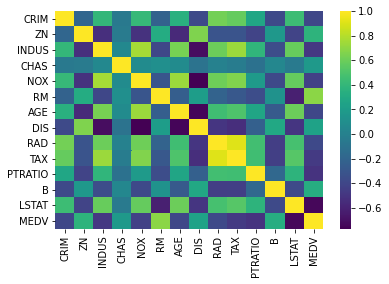

In [20]:
# Matrice des corrélations
MatCorr=df.corr()
MatCorr
# Heatmap
sns.heatmap(MatCorr, cmap='viridis')